## Getting Data to regress unemployment rates in Portugal

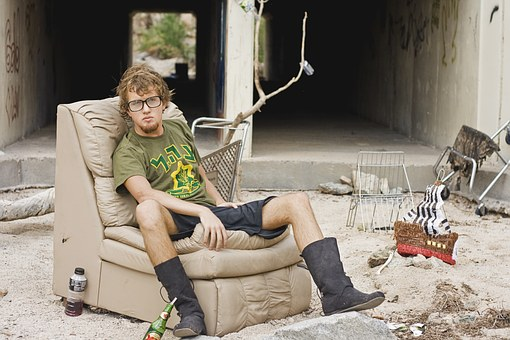

In [1]:
# imports
import pandas as pd

In [2]:
# function takes dataframe and transforms into shares
def transform_share(df):
    columns = df.columns
    total = df.sum(axis=1)
    for i in columns:
        if i in ["Municipality", "Years", "Geographic Group"]:
            pass
        else:
            df[i] = df[i]/total
    
    return df

In [3]:
# transform education columns
def transform_edu(df, sex):
    df = df.rename(columns={'With no educational qualifications':'no_' + sex,
                          'Compulsory education 1st cycle':'first_' + sex,
                           'Compulsory education 2nd cycle': "second_" + sex,
                           'Compulsory education 3rd cycle': "third_" + sex,
                           'Upper-secondary': "upper_"+ sex,
                           'Middle level': "middle_"+ sex,
                           'Higher education': "higher_"+ sex
                          })
    return df

In [4]:
# transform type columns
def transform_type(df, sex):
    df = df.rename(columns={'Looking for 1st job':'first_job_' + sex,
                          'Looking for a new job':'new_job_' + sex,
                          })
    return df

In [5]:
# change name to Municipality
def transform_to_muni(df):
    df = df.rename(columns={'Years':'Municipality',
                           "Geographic Group":'Municipality'})
    df.set_index("Municipality", inplace=True)
    return df

In [6]:
# load all files into pandas df's
unemp = pd.read_excel("data_files/2011/unemp_rate_2011.xlsx")
all_age = pd.read_excel("data_files/2011/unemployment_age_2011.xlsx")
female_edu = pd.read_excel("data_files/2011/unemp_female_edu_2011.xlsx")
male_edu = pd.read_excel("data_files/2011/unemp_male_edu_2011.xlsx")
female_type = pd.read_excel("data_files/2011/unemp_female_type_2011.xlsx")
male_type = pd.read_excel("data_files/2011/unemp_male_type_2011.xlsx")

In [7]:
# prep unemp
unemp = transform_to_muni(unemp)
unemp = unemp.rename(columns={'Total':'Unemployment_Rate'})
unemp["Unemployment_Rate"] = unemp["Unemployment_Rate"]

In [8]:
# prep all_age
all_age = all_age.drop(["Total"], axis=1)
all_age = transform_to_muni(all_age)
all_age = transform_share(all_age)
all_age = all_age.add_prefix("unemp_")

In [9]:
# prep edu
female_edu = transform_to_muni(female_edu)
female_edu = transform_edu(female_edu, "female")
female_edu = transform_share(female_edu)

male_edu = male_edu.drop(["Geographic Group"], axis=1)
male_edu = transform_edu(male_edu, "male")
male_edu = transform_to_muni(male_edu)
male_edu = transform_share(male_edu)

In [10]:
# prep type
female_type = transform_to_muni(female_type)
female_type = transform_type(female_type, "female")
female_type = transform_share(female_type)

male_type = transform_to_muni(male_type)
male_type = transform_type(male_type, "male")
male_type = transform_share(male_type)

In [11]:
# get a list of all dfs
dfs = [all_age, female_edu, male_edu, female_type, male_type]

In [12]:
# concat all df's by looping over it
for d in dfs:
    unemp = unemp.join(d, on="Municipality")

In [13]:
# get data for average earnings
wage_edu = pd.read_excel("data_files/2011/earnings_edu_2011.xlsx")
wage_quali = pd.read_excel("data_files/2011/earnings_quali_2011.xlsx")
wage_sector = pd.read_excel("data_files/2011/earnings_sector_2011.xlsx")

In [14]:
wage_edu = transform_to_muni(wage_edu)
wage_quali = transform_to_muni(wage_quali)
wage_sector = transform_to_muni(wage_sector)

In [15]:
# rename total to average_wage
wage_sector = wage_sector.rename(columns={'Total':'avg_wage'})

In [16]:
wage = [wage_edu, wage_quali, wage_sector]

In [17]:
# concat all df's by looping over it
for d in wage:
    unemp = unemp.join(d, on="Municipality")

In [18]:
# get financial data
fin_rev = pd.read_excel("data_files/2011/revenue_pc_2011.xlsx")
fin_exp = pd.read_excel("data_files/2011/expenditure_pc_2011.xlsx")

In [19]:
fin_rev = transform_to_muni(fin_rev)

In [20]:
fin_exp = transform_to_muni(fin_exp)

In [21]:
fin = [fin_rev, fin_exp]

In [22]:
# concat all df's by looping over it
for d in fin:
    unemp = unemp.join(d, on="Municipality")

In [23]:
# get population data
pop_active = pd.read_excel("data_files/2011/active_people_2011.xlsx")
pop_age = pd.read_excel("data_files/2011/age_group_2011.xlsx")
pop_ageing = pd.read_excel("data_files/2011/ageing_index_2011.xlsx")
pop_migrants = pd.read_excel("data_files/2011/migrants_sex_2011.xlsx")
pop_density = pd.read_excel("data_files/2011/population_density_2011.xlsx")
pop_young = pd.read_excel("data_files/2011/young_age_depend_2011.xlsx")

In [24]:
# transformation
pop_active = transform_to_muni(pop_active)

pop_age = transform_to_muni(pop_age)
pop_age = pop_age
pop_age = pop_age.add_prefix("overall_")

pop_ageing = transform_to_muni(pop_ageing)

pop_migrants = transform_to_muni(pop_migrants)
pop_migrants = pop_migrants
pop_migrants = pop_migrants.add_prefix("migrants_")

pop_density = transform_to_muni(pop_density)

pop_young = transform_to_muni(pop_young)
pop_young = pop_young

In [25]:
pop = [pop_active, pop_age, pop_ageing, pop_density, pop_migrants, pop_young]

In [26]:
# concat all df's by looping over it
for d in pop:
    unemp = unemp.join(d, on="Municipality")

In [27]:
# economy data
econ_dens = pd.read_excel("data_files/2011/enterprise_density_2011.xlsx")
econ_prod = pd.read_excel("data_files/2011/labor_prod_2011.xlsx")

In [28]:
econ_dens = transform_to_muni(econ_dens)
econ_prod = transform_to_muni(econ_prod)

In [29]:
econ = [econ_dens, econ_prod]

In [30]:
# concat all df's by looping over it
for d in econ:
    unemp = unemp.join(d, on="Municipality")

In [31]:
# parliament elections
elec_parl = pd.read_excel("data_files/2011/parliament_election_2011.xlsx")

In [32]:
elec_parl = transform_to_muni(elec_parl)
elec_parl = elec_parl

In [33]:
# join it 
unemp = unemp.join(elec_parl, on="Municipality")

In [34]:
# add geo coordinates
geo_coord = pd.read_csv("data_files/municipalities_coordinates.csv")

In [35]:
geo_coord = geo_coord.drop(["Unnamed: 0"], axis=1)
geo_coord = transform_to_muni(geo_coord)

In [36]:
# join it 
unemp = unemp.join(geo_coord, on="Municipality")

In [37]:
unemp.to_pickle("./unemp.pkl")

In [38]:
unemp.to_excel("unemployment.xlsx")

In [39]:
correlation = unemp.corr()

In [40]:
import seaborn as sns
sns.distplot(correlation["Unemployment_Rate"])

In [41]:
correlation["Unemployment_Rate"].sort_values(ascending=False)

Unemployment_Rate                                                     1.000000
unemp_45 - 54                                                         0.358326
unemp_35 - 44                                                         0.296058
no_male                                                               0.265642
Unskilled workers                                                     0.254781
new_job_male                                                          0.252463
no_female                                                             0.251677
Higher                                                                0.246264
Less 1st cycle                                                        0.237952
PS                                                                    0.235983
Agriculture, farming of animals, hunting, agroforestry and fishing    0.234275
Services                                                              0.232904
Construction                                        